In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [18]:
len(X_train),len(X_test)

(60000, 10000)

In [19]:
X_train[0].shape

(28, 28)

In [20]:
X_train.shape

(60000, 28, 28)

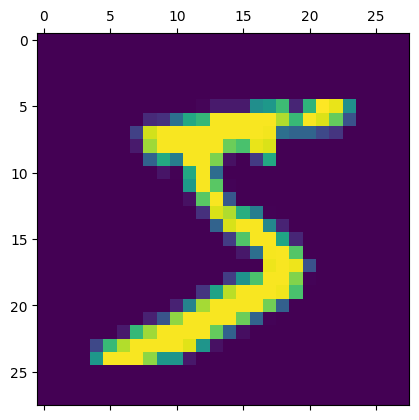

In [21]:
plt.matshow(X_train[0])
plt.show()

In [22]:
y_train[2]

4

after scaling the input, we scale down our input values 0 to 1.

In [23]:
X_train = X_train/255
X_test = X_test/255

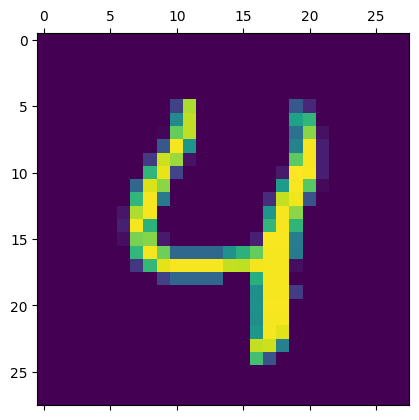

In [24]:
plt.matshow(X_test[4])
plt.show()

### only ANN

In [26]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/ANN", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8673 - loss: 0.4718
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9590 - loss: 0.1403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0657
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0526


In [27]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0936


[0.08167876303195953, 0.9740999937057495]

In [28]:
y_predicted=model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.7808677e-03, 1.0552403e-03, 4.4560522e-01, 9.0006536e-01,
       4.2367137e-06, 2.0674638e-02, 1.1709552e-07, 9.9996585e-01,
       1.3840173e-02, 4.2667307e-02], dtype=float32)

In [29]:
np.argmax(y_predicted[4])

4

In [30]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,[np.argmax(i) for i in y_predicted]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### CNN

[Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)

In [33]:
cnn=keras.Sequential([
    # CNN
    keras.layers.Conv2D(30,(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    # ANN
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/CNN", histogram_freq=1)

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

/home/animesh/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9072 - loss: 0.3103
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9826 - loss: 0.0553
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9894 - loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9931 - loss: 0.0212
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9957 - loss: 0.0130


In [35]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9816 - loss: 0.0615


[0.045617785304784775, 0.986299991607666]

In [36]:
y_predicted=cnn.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([4.7999276e-03, 7.0461729e-03, 1.0519715e-01, 7.7509922e-01,
       4.0806306e-04, 5.9605128e-04, 2.4252200e-10, 9.9999475e-01,
       5.7303235e-02, 8.1523335e-01], dtype=float32)

In [37]:
print(classification_report(y_test,[np.argmax(i) for i in y_predicted]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

